# Experimental Evaluation
This notebook contains the evaluation of the main results and various ablation settings for the experiments conducted in the `ecml2025` project.

In [1]:
from experiments import embedding_methods
# Import necessary modules
from results import get_result_summary, get_best_results
import pandas as pd
import os


# Automatically reload modules
%load_ext autoreload
%autoreload 2

## Induction Experiments
Median test F1-score at 67%/33% train/test splits for our LLM-based zero-shot decision tree induction approach compared to the machine learning baselines. *BSS via Interpretable AI 3.1.1 does not support multiclass classifications.

In [2]:
# Induction Results
result_path_induction_1 = "./results/induction_results.csv"
result_path_induction_2 = "./results/automl_test_results.csv"
result_path_induction_3 = "./results/optimal_test_results.csv"
get_result_summary([result_path_induction_1, result_path_induction_2, result_path_induction_3], title="Induction Results (F1-Score)", score="f1_score")

Dataset,autogluon,autoprognosis,bss,claude,gemini,gpt-4o,gpt-o1,oct,tabpfn
acl,0.33,0.44,0.49,0.44,0.44,0.66,0.49,0.49,0.49
bankruptcy,0.87,0.87,0.87,0.59,0.70,0.87,0.80,0.82,0.87
boxing1,0.70,0.72,0.54,0.44,0.47,0.50,0.57,0.43,0.68
boxing2,0.68,0.78,0.70,0.54,0.45,0.64,0.62,0.70,0.61
colic,0.82,0.83,0.81,0.57,0.52,0.59,0.61,0.82,0.80
creditscore,0.96,1.00,0.65,0.55,0.73,0.49,0.45,1.00,0.90
heart_h,0.79,0.80,0.80,0.25,0.64,0.39,0.27,0.78,0.77
hepatitis,0.80,0.71,0.68,0.37,0.57,0.54,0.57,0.61,0.68
house_votes_84,0.96,0.95,0.94,0.11,0.51,0.43,0.87,0.94,0.95
irish,0.97,0.99,0.74,0.55,0.82,0.52,0.80,0.99,0.98


FileNotFoundError: [Errno 2] No such file or directory: '../plots/boxplot_induction_acl_f1.pdf'

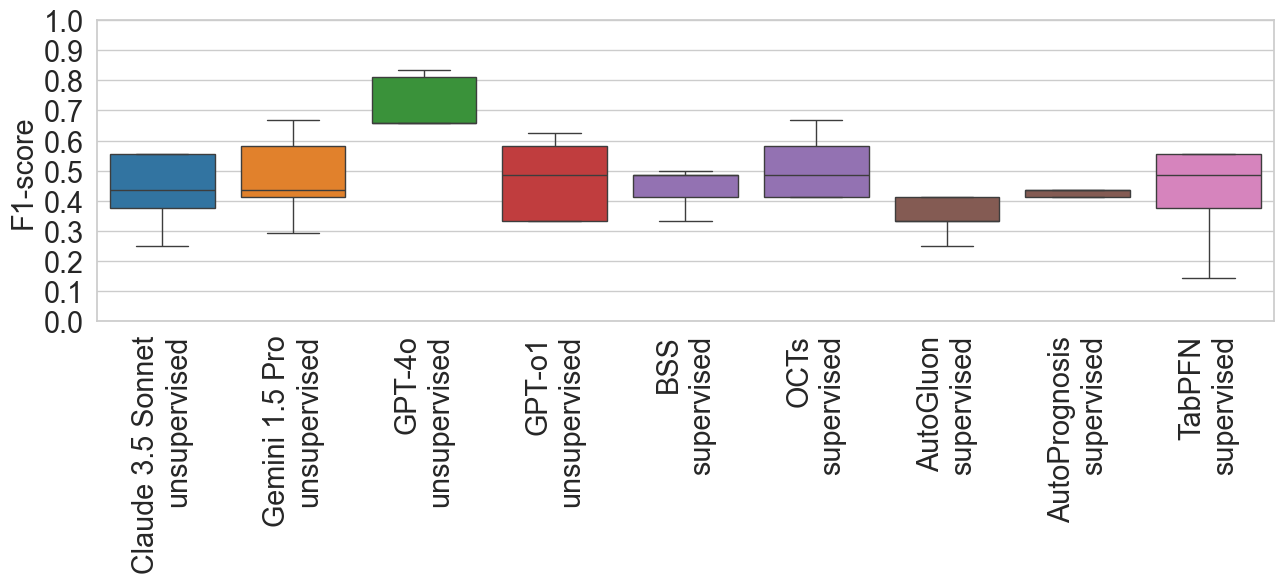

In [26]:
from llm_trees.plotting import save_plot

save_plot("induction","f1_score","67/33","acl","boxplot")

# for approach in ["induction", "embedding"]:
#     for score in ["f1_score", "accuracy"]:
#         for dataset in ["public", "acl", "posttrauma"]:
#             for plot_type in ["boxplot", "grouped_boxplot"]:
#                 save_plot(
#                     approach,
#                     score,
#                     "67/33",
#                     dataset,
#                     plot_type
#                     )

## Embedding Experiments
Median test F1-score at 67%/33% train/test splits of a multi-layer perceptron without embeddings (first column).
Subsequent columns display the performance difference of our LLM-based zero-shot decision tree embedding approach
as well as the unsupervised, self-supervised, and supervised embedding baselines relative to the first column.

In [4]:
# Embedding Results
result_path_embeddings_1 = "./results/embedding_results.csv"
get_result_summary([result_path_embeddings_1], title="Embedding Results (F1-Score)", score="f1_score", embedding_methods=embedding_methods.keys())

Dataset,no,claude,gemini,gpt-4o,gpt-o1,rt-us,et-ss,rf-ss,xg-ss,et-sv,rf-sv,xg-sv
acl,0.38,+0.11,+0.03,+0.20,+0.28,+0.20,0.00,-0.01,+0.02,+0.18,+0.18,+0.28
bankruptcy,0.80,+0.06,+0.08,+0.08,+0.02,+0.01,+0.01,+0.01,+0.07,0.00,-0.03,-0.06
boxing1,0.40,+0.17,+0.18,+0.16,+0.18,+0.28,0.00,0.00,+0.16,0.00,0.00,-0.01
boxing2,0.62,+0.05,-0.01,+0.05,+0.07,+0.06,-0.01,-0.01,-0.06,-0.07,+0.03,+0.12
colic,0.81,+0.01,+0.00,+0.02,+0.02,-0.05,-0.43,-0.43,+0.03,-0.13,-0.14,-0.06
creditscore,0.43,+0.22,+0.57,+0.22,+0.19,+0.21,+0.46,+0.45,+0.04,+0.01,+0.57,+0.54
heart_h,0.80,-0.01,-0.01,-0.05,-0.03,-0.03,-0.41,-0.41,-0.02,-0.02,-0.06,-0.38
hepatitis,0.75,+0.02,+0.02,+0.02,+0.02,-0.21,-0.31,-0.31,-0.12,-0.31,-0.31,-0.07
house_votes_84,0.95,+0.01,+0.02,+0.01,+0.02,-0.02,-0.22,-0.04,0.00,-0.04,-0.05,+0.02
irish,0.99,-0.01,-0.01,-0.01,-0.01,-0.02,-0.29,-0.28,-0.06,-0.12,-0.10,+0.01


## Embedding Dimensionality 
Dimension for our zero-shot decision forests, consisting of 5 decision trees generated by the 4 LLMs.

In [5]:
result_path_dimensions = "./results/embedding_dimensions"
print(pd.read_csv(os.path.join(result_path_dimensions, "embedding_dimensions.csv"), index_col=0))

                Features set size  claude  gemini  gpt-4o  gpt-o1
Dataset                                                          
acl                            20      19      11      12      14
bankruptcy                      6      18      10      10      13
boxing1                         3      16      11      10      14
boxing2                         3      17      10      17      11
creditscore                     6      19      11      10      21
japansolvent                    9      23      21      27      14
colic                          22      20      35      30      22
heart_h                        13      30      10      10      23
hepatitis                      19      18      23      15      17
house_votes_84                 16      18      14      21      18
irish                           5      15      10      10      10
labor                          16      25      10      10      16
penguins                        6      10      10      11      14
posttrauma

## Number of Features
Number of features selected by the 4 LLMs in their 5 generated decision trees

In [6]:
result_path_dimensions = "./results/embedding_dimensions"
print(pd.read_csv(os.path.join(result_path_dimensions, "num_features.csv"), index_col=0))

                Features set size  claude  gemini  gpt-4o  gpt-o1
Dataset                                                          
acl                            20       4       4       2      17
bankruptcy                      6       4       5       2       2
boxing1                         3       3       3       2       3
boxing2                         3       3       2       3       2
creditscore                     6       5       2       3       5
japansolvent                    9       5       5       8       3
colic                          22       6       8       7       4
heart_h                        13       7       3       2       6
hepatitis                      19       5       6      19       3
house_votes_84                 16       4       3      16       5
irish                           5       3       5       5       2
labor                          16       4       3       3      16
penguins                        6       2       3       2       2
posttrauma

## Ablation Settings
Ablation for our induction experiments, showing median test F1-score differences at 67%/33% train/test splits.

### Ablation Setting 1: Tree Depth for Induction

The table show the best tree depth for the induction experiments as well as the corresponding F1-Score.

In [7]:
result_path_tree_depth_induction = "results/ablations/setting_1_optimal_tree_depth_induction.csv"
get_best_results(result_path_tree_depth_induction, x_param='max_tree_depth', y_metric='f1_score', split="67/33")

,claude,gemini,gpt-4o,gpt-o1
dataset,,,,
acl,5.0 (0.75),2.0 (0.67),2.0 (0.83),3.0 (0.81)
bankruptcy,5.0 (0.94),1.0 (0.94),2.0 (0.94),1.0 (0.94)
boxing1,1.0 (0.70),2.0 (0.64),5.0 (0.69),1.0 (0.70)
boxing2,4.0 (0.66),5.0 (0.69),3.0 (0.70),4.0 (0.75)
colic,3.0 (0.64),1.0 (0.65),3.0 (0.67),5.0 (0.77)
creditscore,3.0 (0.88),1.0 (0.86),2.0 (0.76),1.0 (0.86)
heart_h,3.0 (0.66),1.0 (0.79),2.0 (0.76),3.0 (0.65)
hepatitis,5.0 (0.69),2.0 (0.78),2.0 (0.64),2.0 (0.78)
house_votes_84,1.0 (0.98),1.0 (0.98),1.0 (0.97),3.0 (0.99)


### Ablation Setting 2: Tree Depth for Embeddings

The table show the best tree depth for the embedding experiments as well as the corresponding F1-Score.

In [8]:
result_path_tree_depth_embeddings = "./results/ablations/setting_2_optimal_tree_depth_embeddings.csv"
get_best_results(result_path_tree_depth_embeddings, x_param='max_tree_depth', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
acl,2.0 (0.83),5.0 (0.73),2.0 (0.73),1.0 (0.58)
bankruptcy,1.0 (0.94),4.0 (0.94),1.0 (0.94),4.0 (0.94)
boxing1,4.0 (0.71),5.0 (0.76),2.0 (0.69),5.0 (0.78)
boxing2,5.0 (0.75),4.0 (0.77),5.0 (0.79),5.0 (0.82)
colic,1.0 (0.88),1.0 (0.89),1.0 (0.89),3.0 (0.90)
creditscore,2.0 (0.76),4.0 (0.81),3.0 (1.00),2.0 (0.81)
heart_h,4.0 (0.81),3.0 (0.82),1.0 (0.82),2.0 (0.82)
hepatitis,2.0 (0.86),2.0 (0.88),2.0 (0.86),2.0 (0.80)
house_votes_84,5.0 (0.98),1.0 (0.98),4.0 (0.98),5.0 (0.99)


### Ablation Setting 3: Number of Trees

The table show the best number of trees for the induction experiments as well as the corresponding F1-Score.

In [9]:
result_path_number_of_trees_embeddings = "./results/ablations/setting_3_optimal_number_of_trees_embeddings.csv"
get_best_results(result_path_number_of_trees_embeddings, x_param='num_trees', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
acl,4.0 (0.83),4.0 (0.81),3.0 (0.66),4.0 (0.58)
bankruptcy,1.0 (0.94),1.0 (0.94),3.0 (0.94),1.0 (0.94)
boxing1,2.0 (0.70),1.0 (0.74),1.0 (0.74),2.0 (0.78)
boxing2,3.0 (0.74),3.0 (0.79),1.0 (0.67),3.0 (0.74)
colic,5.0 (0.90),2.0 (0.87),1.0 (0.89),5.0 (0.89)
creditscore,1.0 (0.76),2.0 (0.73),3.0 (1.00),4.0 (0.76)
heart_h,1.0 (0.80),1.0 (0.81),4.0 (0.81),3.0 (0.82)
hepatitis,3.0 (0.88),5.0 (0.88),3.0 (0.86),2.0 (0.86)
house_votes_84,1.0 (0.98),2.0 (0.98),5.0 (0.98),4.0 (0.99)


### Ablation Setting 4: Temperature Induction

The table show the best temperature for the induction experiments as well as the corresponding F1-Score.

In [10]:
result_path_temperature_induction = "./results/ablations/setting_4_optimal_temperature_induction.csv"
get_best_results(result_path_temperature_induction, x_param='temperature', y_metric='f1_score', split="67/33")

,gpt-4o,gemini,claude
dataset,,,
acl,1.0 (0.83),1.0 (0.67),0.0 (0.56)
bankruptcy,0.0 (0.94),0.0 (0.86),1.0 (0.72)
boxing1,0.0 (0.70),0.5 (0.65),1.0 (0.66)
boxing2,0.5 (0.70),0.0 (0.66),0.5 (0.70)
colic,1.0 (0.63),1.0 (0.58),0.5 (0.69)
creditscore,1.0 (0.76),0.0 (0.86),1.0 (0.78)
heart_h,1.0 (0.76),1.0 (0.72),0.5 (0.39)
hepatitis,1.0 (0.64),1.0 (0.78),1.0 (0.62)
house_votes_84,0.0 (0.97),1.0 (0.97),0.0 (0.41)


### Ablation Setting 5: Temperature Embeddings

In [11]:
result_path_temperature_embeddings = "./results/ablations/setting_5_optimal_temperature_embeddings.csv"
get_best_results(result_path_temperature_embeddings, x_param='temperature', y_metric='f1_score', split="67/33")

,gpt-4o,gemini,claude
dataset,,,
acl,1.0 (0.75),1.0 (0.62),0.0 (0.66)
bankruptcy,0.0 (0.94),0.0 (0.94),0.0 (0.94)
boxing1,1.0 (0.63),0.5 (0.74),1.0 (0.74)
boxing2,0.0 (0.70),0.5 (0.79),1.0 (0.69)
colic,1.0 (0.90),1.0 (0.89),0.0 (0.89)
creditscore,0.0 (0.76),0.0 (1.00),0.0 (0.76)
heart_h,0.0 (0.81),1.0 (0.80),1.0 (0.82)
hepatitis,0.0 (0.84),1.0 (0.86),1.0 (0.78)
house_votes_84,1.0 (0.98),1.0 (0.98),1.0 (0.99)


### Ablation Setting 6: Number of In-Context Examples for Induction

In [12]:
result_path_number_of_examples_induction = "./results/ablations/setting_6_optimal_number_of_examples_induction.csv"
get_best_results(result_path_number_of_examples_induction, x_param='num_examples', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
acl,1.0 (0.83),1.0 (0.62),2.0 (0.73),1.0 (0.56)
bankruptcy,1.0 (0.94),1.0 (0.94),2.0 (0.88),1.0 (0.72)
boxing1,2.0 (0.62),1.0 (0.64),1.0 (0.64),1.0 (0.66)
boxing2,1.0 (0.68),1.0 (0.70),1.0 (0.66),2.0 (0.64)
colic,3.0 (0.66),1.0 (0.68),3.0 (0.65),1.0 (0.61)
creditscore,1.0 (0.76),1.0 (0.54),3.0 (0.76),1.0 (0.78)
heart_h,1.0 (0.76),3.0 (0.40),1.0 (0.72),2.0 (0.40)
hepatitis,2.0 (0.78),1.0 (0.78),1.0 (0.78),2.0 (0.78)
house_votes_84,1.0 (0.95),3.0 (0.97),1.0 (0.97),3.0 (0.42)


### Ablation Setting 7: Number of In-Context Examples for Embeddings

In [13]:
result_path_number_of_examples_embeddings = "./results/ablations/setting_7_optimal_number_of_examples_embeddings.csv"
get_best_results(result_path_number_of_examples_embeddings, x_param='num_examples', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
acl,1.0 (0.75),1.0 (0.73),1.0 (0.62),2.0 (0.58)
bankruptcy,2.0 (0.94),3.0 (0.94),3.0 (0.94),1.0 (0.94)
boxing1,2.0 (0.70),1.0 (0.74),1.0 (0.66),1.0 (0.74)
boxing2,1.0 (0.69),1.0 (0.74),2.0 (0.77),2.0 (0.74)
colic,1.0 (0.90),2.0 (0.89),1.0 (0.89),1.0 (0.89)
creditscore,3.0 (0.88),3.0 (0.76),1.0 (1.00),3.0 (0.86)
heart_h,2.0 (0.80),1.0 (0.80),3.0 (0.81),3.0 (0.83)
hepatitis,1.0 (0.82),1.0 (0.88),1.0 (0.86),2.0 (0.80)
house_votes_84,1.0 (0.98),3.0 (0.99),2.0 (0.99),1.0 (0.99)


### Ablation Setting 8: Two Embedding Variants

In [14]:
result_path_append_raw_features = "results/ablations/setting_8_optimal_append_raw_features_embeddings.csv"
get_best_results(result_path_append_raw_features, x_param='concatenation', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
acl,0.0 (0.83),0.0 (0.83),0.0 (0.83),0.0 (0.83)
bankruptcy,0.0 (0.94),0.0 (0.94),0.0 (0.94),0.0 (0.94)
boxing1,0.0 (0.65),0.0 (0.74),0.0 (0.78),1.0 (0.74)
boxing2,0.0 (0.74),1.0 (0.74),0.0 (0.73),0.0 (0.74)
colic,1.0 (0.90),1.0 (0.86),1.0 (0.89),1.0 (0.89)
creditscore,0.0 (0.76),0.0 (0.73),0.0 (1.00),0.0 (0.76)
heart_h,0.0 (0.79),1.0 (0.80),1.0 (0.80),1.0 (0.82)
hepatitis,1.0 (0.82),1.0 (0.88),1.0 (0.86),1.0 (0.78)
house_votes_84,0.0 (0.98),0.0 (0.98),0.0 (0.98),1.0 (0.99)


### Ablation Setting 9: Decision Tree vs. Free Form

In [15]:
result_path_decision_tree_vs_free_form_induction = "./results/ablations/setting_9_optimal_decision_tree_vs_free_form_induction.csv"
get_best_results(result_path_decision_tree_vs_free_form_induction, x_param='decision_tree', y_metric='f1_score', split="67/33")

,gpt-4o,gemini,claude,gpt-o1
dataset,,,,
acl,0.0 (0.70),0.0 (0.58),1.0 (0.56),1.0 (0.56)
bankruptcy,1.0 (0.94),1.0 (0.86),0.0 (0.70),1.0 (0.94)
boxing1,1.0 (0.70),1.0 (0.59),1.0 (0.62),0.0 (0.57)
boxing2,0.0 (0.48),1.0 (0.66),1.0 (0.62),0.0 (0.48)
colic,0.0 (0.85),0.0 (0.87),0.0 (0.85),0.0 (0.84)
creditscore,1.0 (0.69),1.0 (0.86),0.0 (0.68),1.0 (0.73)
heart_h,1.0 (0.40),1.0 (0.43),0.0 (0.34),1.0 (0.77)
hepatitis,0.0 (0.45),1.0 (0.38),1.0 (0.61),1.0 (0.33)
house_votes_84,1.0 (0.97),0.0 (0.93),0.0 (0.93),1.0 (0.98)


### Ablation Setting 10: Description for Induction

In [16]:
result_path_description = "./results/ablations/setting_10_optimal_description_induction.csv"
get_best_results(result_path_description, x_param='description', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
bankruptcy,0.0 (0.94),1.0 (0.94),1.0 (0.86),1.0 (0.61)


### Ablation Setting 11: Description for Embeddings

In [17]:
result_path_description = "./results/ablations/setting_11_optimal_description_embeddings.csv"
get_best_results(result_path_description, x_param='description', y_metric='f1_score', split="67/33")

,gpt-4o,gpt-o1,gemini,claude
dataset,,,,
bankruptcy,1.0 (0.94),1.0 (0.94),1.0 (0.94),0.0 (0.88)
